<a href="https://colab.research.google.com/github/kamakshidasan/anice/blob/main/6%20Remove%20Nth%20Node%20From%20End%20of%20List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**https://leetcode.com/problems/remove-nth-node-from-end-of-list/**
---

Given the head of a linked list, remove the nth node from the end of the list and return its head.

Example 1:\
Input: head = [1,2,3,4,5], n = 2\
Output: [1,2,3,5]\
\
Example 2:\
Input: head = [1], n = 1\
Output: []\
\
Example 3:\
Input: head = [1,2], n = 1\
Output: [1]

Constraints:\
\
The number of nodes in the list is sz.\
1 <= sz <= 30\
0 <= Node.val <= 100\
1 <= n <= sz\
\
Follow up: Could you do this in one pass?

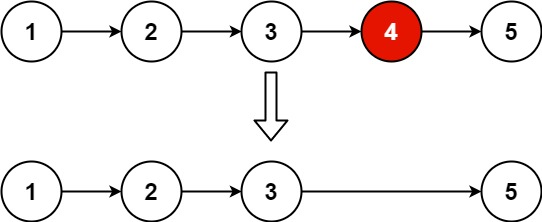

#Solution

Read the question carefully, it says nth node from *end*!

### Reaching the nth node from the end

- Have two pointers -- one fast and one slow
- Iterate the fast pointer normally till it reaches the end
- Count the position of the fast pointer
- Once the fast pointer is ahead of the nth node from the *start*, then initialize the second node
- When the iteration of the fast pointer terminates, the slow pointer will be at the nth position from the end

### Deleting the nth nodde from the end

- If you want delete this node, you should have a previous pointer, when you intitialize this slow pointer
- Upon termination of the fast pointer loop, to delete the node associated with the slow pointer, just say previous.next = slow.next

#### Edge case

- What happens when the slow pointer is the head itself?
 - Then, return previous.next

 The other edge cases, seem to be satisfied by the constraints in this question.

 ---

In [ ]:
class Solution(object):
    def removeNthFromEnd(self, head, n):
        
        slow = head
        fast = head
        prev = head
        
        count = 0
        
        while (fast):
            count += 1
            
            if count > n:
                prev = slow
                slow = slow.next
                
            fast = fast.next
        
        if slow == head:
            return slow.next
        else:
            prev.next = slow.next
            return head

## Leetcode solution

The first pointer advances the list by n+1 steps from the beginning, while the second pointer starts from the beginning of the list. Now, both pointers are exactly separated by nn nodes apart. We maintain this constant gap by advancing both pointers together until the first pointer arrives past the last node. The second pointer will be pointing at the nnth node counting from the last. We relink the next pointer of the node referenced by the second pointer to point to the node's next next node.\


There is one prime difference between Leetcode's solution and mine.

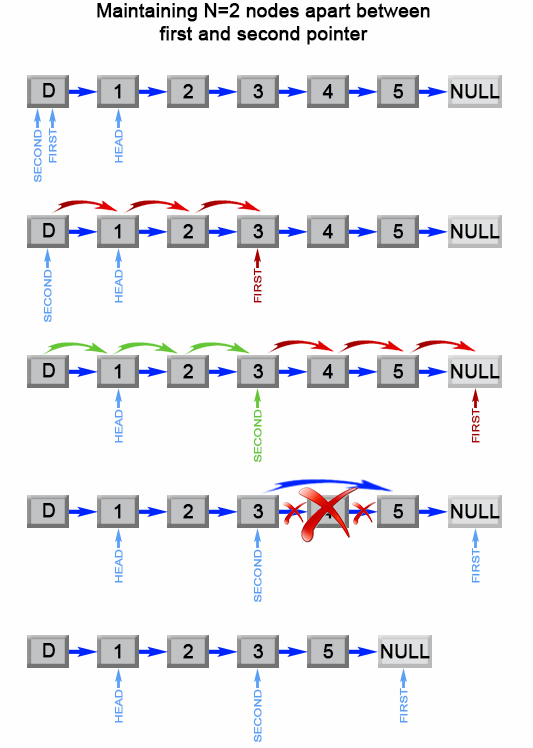

Both his way and mine are ways to get over that small edge condition:

What happens when the node to delete is the head itself?

- What I do:
 - Check if head == slow
  - If yes, return slow.next
  - If not, return the original head in every other case

- What Leetcode does:
 - He never keeps a previous pointer for slow
 - Instead, he first moves fast pointer by n steps in one loop
 - Then, he makes sure that slow pointer is n+1 steps behind
  - Therefore, he simply jumps over the nth node the end, by saying ***slow.next = slow.next.next***
  - Instead of checking equality of slow pointer with head, this guy just returns dummy.next in all cases

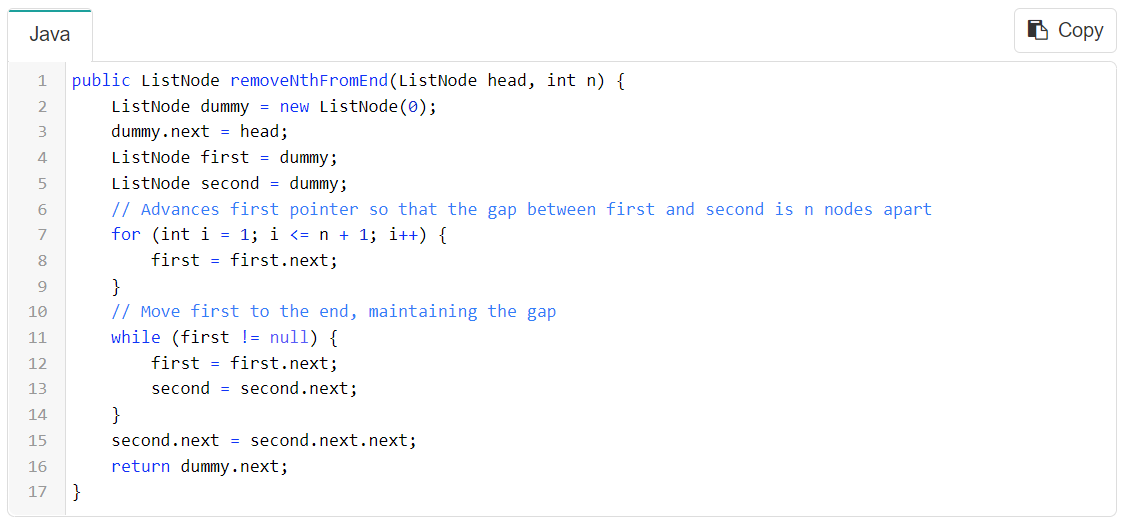

##Takeaway

The dummy pointer idea is interesting, it might come in use sometime

## Premise

The gap between the fast pointer and slow pointer will *always* be n nodes